<a href="https://colab.research.google.com/github/mathewdavid/maths_data_science/blob/main/Amazon_Sales_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.subplots
import plotly.graph_objects as go
from scipy import stats
#!pip install plotly

In [3]:
amazon_df = pd.read_csv('amazon.csv')

In [4]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17200 entries, 0 to 17199
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               17200 non-null  int64  
 1   Order ID            17200 non-null  object 
 2   Date                17200 non-null  object 
 3   Status              17200 non-null  object 
 4   Fulfilment          17200 non-null  object 
 5   Sales Channel       17200 non-null  object 
 6   ship-service-level  17200 non-null  object 
 7   Style               17200 non-null  object 
 8   SKU                 17200 non-null  object 
 9   Category            17200 non-null  object 
 10  Size                17200 non-null  object 
 11  ASIN                17200 non-null  object 
 12  Courier Status      16139 non-null  object 
 13  Qty                 17199 non-null  float64
 14  currency            16163 non-null  object 
 15  Amount              16163 non-null  float64
 16  ship

In [5]:
amazon_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [11]:
#Handling missing values
# Check for missing values in the dataframe
print(amazon_df.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         1060
Qty                       0
currency                  0
Amount                    0
ship-city                 7
ship-state                7
ship-postal-code          7
ship-country              7
promotion-ids          6156
B2B                       0
fulfilled-by          10975
dtype: int64


In [7]:
# Remove rows with missing values in the 'Qty' column
amazon_df = amazon_df.dropna(subset=['Qty'])

In [8]:
# Impute missing values in the 'Amount' and 'currency' columns with the mean and mode, respectively
amazon_df['Amount'].fillna(amazon_df['Amount'].mean(), inplace=True)
amazon_df['currency'].fillna(amazon_df['currency'].mode()[0], inplace=True)

In [10]:
# Drop the 'Unnamed: 22' column
amazon_df = amazon_df.drop('Unnamed: 22', axis=1)

In [13]:
# Check for duplicate rows in the dataframe
print(amazon_df.duplicated().sum())

0


In [14]:
# Convert the 'Date' column to datetime format
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])

# Convert the 'Qty' column to integer format
amazon_df['Qty'] = amazon_df['Qty'].astype(int)

# Convert the 'Amount' column to float format
amazon_df['Amount'] = amazon_df['Amount'].astype(float)

In [15]:
# Calculate summary statistics for the 'Qty' column
print(amazon_df['Qty'].describe())

count    17199.000000
mean         0.900343
std          0.349038
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: Qty, dtype: float64


In [16]:
# Calculate summary statistics for the 'Amount' column
print(amazon_df['Amount'].describe())

count    17199.000000
mean       622.710565
std        263.613664
min          0.000000
25%        442.000000
50%        597.000000
75%        744.000000
max       5495.000000
Name: Amount, dtype: float64


<Axes: ylabel='Frequency'>

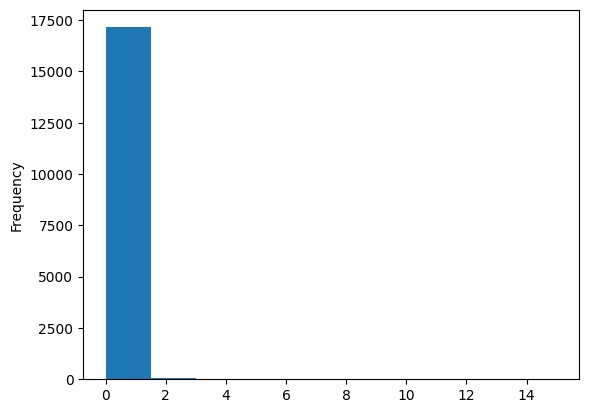

In [17]:
# Plot a histogram of the 'Qty' column
amazon_df['Qty'].plot.hist()

<Axes: >

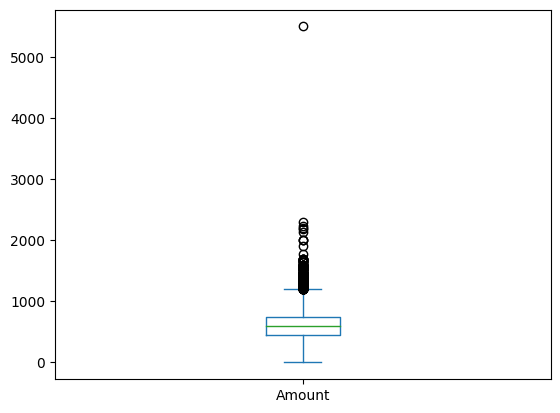

In [18]:
# Plot a box plot of the 'Amount' column
amazon_df['Amount'].plot.box()

In [22]:
# Calculate the correlation coefficients between the 'Qty' and 'Amount' columns
correlation = amazon_df[['Qty', 'Amount']].corr()

# Print the correlation matrix
print(correlation)


             Qty    Amount
Qty     1.000000  0.044276
Amount  0.044276  1.000000


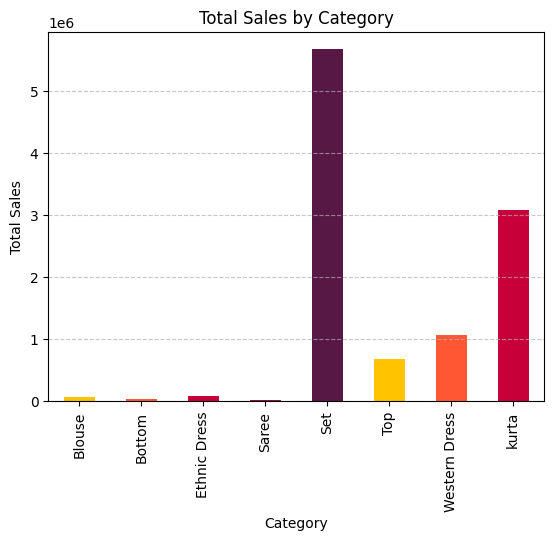

In [24]:
# Plot a bar chart of the distribution of sales by category
# Set the color palette
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']

# Plot the bar chart with custom colors
category_sales.plot.bar(color=colors)

# Add title and axis labels
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [26]:
# Calculate the mean of the 'Qty' column
mean_qty = amazon_df['Qty'].mean()

In [27]:

# Calculate the median of the 'Qty' column
median_qty = amazon_df['Qty'].median()

print('Mean Qty: ', mean_qty)
print('Median Qty: ', median_qty)


Mean Qty:  0.9003430432001861
Median Qty:  1.0


In [29]:
# Calculate the standard deviation of the 'Amount' column
std_amount = amazon_df['Amount'].std()

# Calculate the range of the 'Amount' column
range_amount = amazon_df['Amount'].max() - amazon_df['Amount'].min()

print('Std Amount: ', std_amount)
print('Range Amount: ', range_amount)

Std Amount:  263.6136644310625
Range Amount:  5495.0


In [30]:
# Calculate the correlation coefficient between the 'Qty' and 'Amount' columns
corr_coeff = amazon_df[['Qty', 'Amount']].corr().iloc[0,1]

print('Correlation Coefficient: ', corr_coeff)

Correlation Coefficient:  0.04427580781814014


In [31]:
# Calculate the quartiles of the 'Qty' column
q1_qty = amazon_df['Qty'].quantile(0.25)
q2_qty = amazon_df['Qty'].quantile(0.5)
q3_qty = amazon_df['Qty'].quantile(0.75)

# Calculate the interquartile range of the 'Qty' column
iqr_qty = q3_qty - q1_qty

print('Q1 Qty: ', q1_qty)
print('Q2 Qty: ', q2_qty)
print('Q3 Qty: ', q3_qty)
print('IQR Qty: ', iqr_qty)

Q1 Qty:  1.0
Q2 Qty:  1.0
Q3 Qty:  1.0
IQR Qty:  0.0


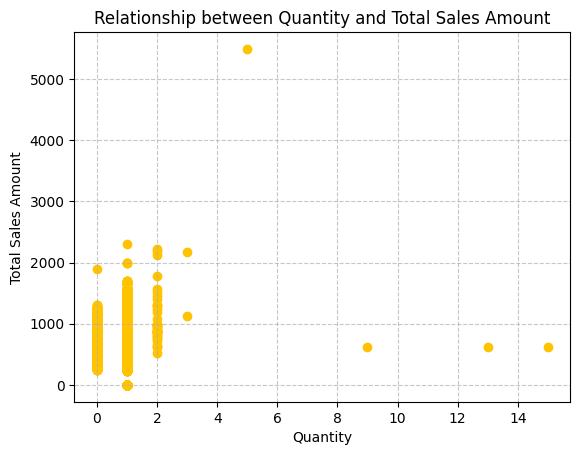

In [34]:
# Set the color palette
colors = ['#FFC300']

# Create a scatter plot of 'Qty' vs. 'Amount'
plt.scatter(x=amazon_df['Qty'], y=amazon_df['Amount'], color=colors)

# Add title and axis labels
plt.title('Relationship between Quantity and Total Sales Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Sales Amount')

# Add gridlines
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

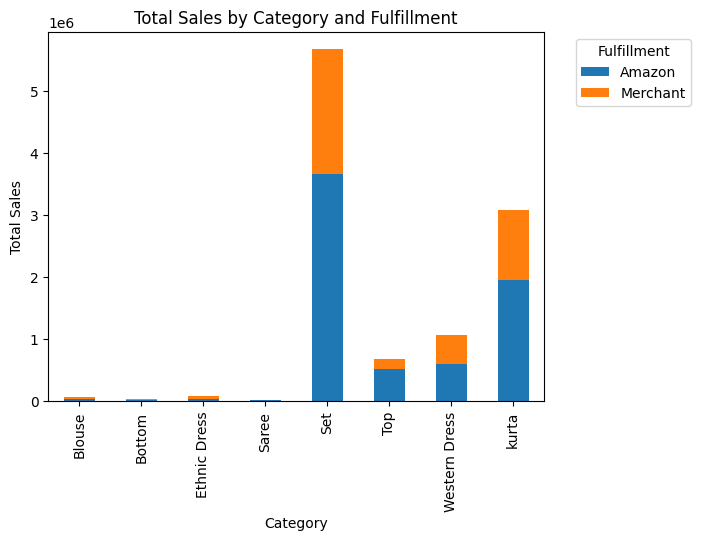

In [36]:
# Group the data by 'Category' and 'Fulfilment', and calculate the total sales for each group
sales_by_category_fulfillment = amazon_df.groupby(['Category', 'Fulfilment'])['Amount'].sum().unstack()

# Plot a stacked bar chart of sales by category and fulfillment
sales_by_category_fulfillment.plot.bar(stacked=True)

# Add title and axis labels
plt.title('Total Sales by Category and Fulfillment')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Add legend
plt.legend(title='Fulfillment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

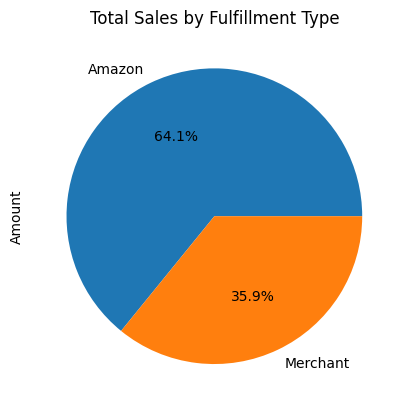

In [37]:
# Group the data by 'Fulfilment', and calculate the total sales for each group
sales_by_fulfillment = amazon_df.groupby('Fulfilment')['Amount'].sum()

# Plot a pie chart of sales by fulfillment type
sales_by_fulfillment.plot.pie(autopct='%1.1f%%')

# Add title
plt.title('Total Sales by Fulfillment Type')

# Show the plot
plt.show()

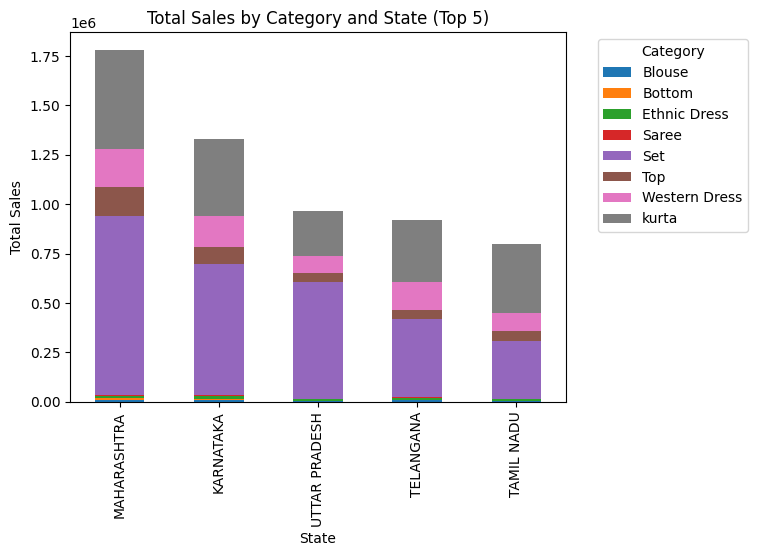

In [38]:
# Group the data by 'ship-state' and 'Category', and calculate the total sales for each group
sales_by_state_category = amazon_df.groupby(['ship-state', 'Category'])['Amount'].sum()

# Identify the top 5 states by total sales
top_states = sales_by_state_category.groupby('ship-state').sum().sort_values(ascending=False).head(5).index

# Filter the data to include only the top 5 states
sales_by_top_states = sales_by_state_category.loc[top_states]

# Plot a stacked bar chart of sales by category and state
sales_by_top_states.unstack().plot.bar(stacked=True)

# Add title and axis labels
plt.title('Total Sales by Category and State (Top 5)')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Add legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

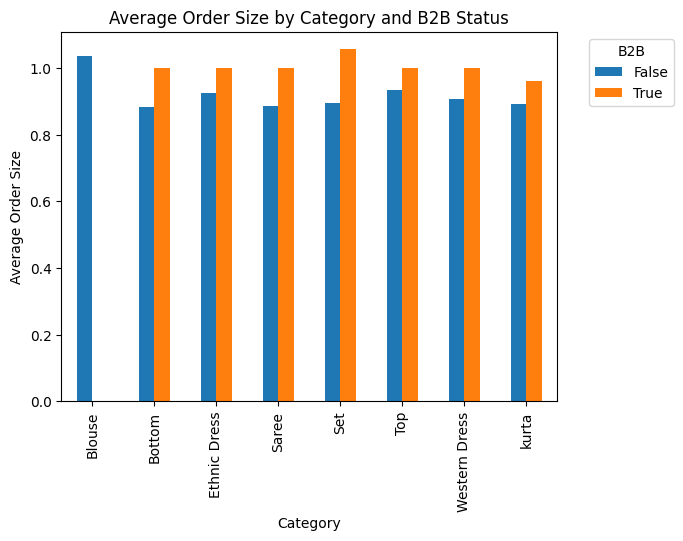

In [39]:
# Group the data by 'Category' and 'B2B', and calculate the average order size for each group
avg_order_size_by_category_b2b = amazon_df.groupby(['Category', 'B2B'])['Qty'].mean()

# Plot a bar chart of average order size by category and B2B status
avg_order_size_by_category_b2b.unstack().plot.bar()

# Add title and axis labels
plt.title('Average Order Size by Category and B2B Status')
plt.xlabel('Category')
plt.ylabel('Average Order Size')

# Add legend
plt.legend(title='B2B', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [40]:
# Create a new column called 'purchased', which indicates whether the customer made a purchase
amazon_df['purchased'] = amazon_df['Amount'].apply(lambda x: 1 if x > 0 else 0)

In [41]:
# Select the features (i.e. variables) to be used in the model
features = ['Qty', 'Amount']

In [43]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(amazon_df[features], amazon_df['purchased'], test_size=0.3, random_state=42)

In [45]:
# Build a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(train_data, train_labels)

LogisticRegression()

In [47]:
# Use the trained model to make predictions on the test data
predictions = model.predict(test_data)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 100.00%


In [51]:
# Drop unnecessary columns
amazon_df.drop(columns=['index', 'Courier Status', 'fulfilled-by'], inplace=True)

# Convert 'Date' column to datetime format
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])

# Add columns for year and month
amazon_df['Year'] = amazon_df['Date'].dt.year
amazon_df['Month'] = amazon_df['Date'].dt.month

In [52]:
# Group the data by year and month, and calculate the total sales for each group
sales_by_year_month = amazon_df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Create a bar chart of total sales by year and month
fig = px.bar(sales_by_year_month, x='Month', y='Amount', color='Year')

# Add title and axis labels
fig.update_layout(title='Total Sales by Year and Month', xaxis_title='Month', yaxis_title='Total Sales')

# Show the plot
fig.show()

In [55]:
# Create a scatter plot of 'Qty' vs. 'Amount'
scatter_fig = px.scatter(amazon_df, x='Qty', y='Amount', color='Category')

# Add title and axis labels
scatter_fig.update_layout(title='Relationship between Quantity and Total Sales Amount', xaxis_title='Quantity', yaxis_title='Total Sales')

# Create a dashboard with two plots
dashboard = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=('Total Sales by Year and Month', 'Relationship between Quantity and Total Sales Amount'))
dashboard.add_trace(fig.data[0], row=1, col=1)
dashboard.add_trace(scatter_fig.data[0], row=1, col=2)

# Update the dashboard layout
dashboard.update_layout(height=500, showlegend=False)

# Show the dashboard
dashboard.show()